In [30]:
import os 
# create one endo and one exo file
endo_dict = {}
exo_dict = {} 

os.chdir('/Users/paulwissenberg/Coding/sequenenz_analyzer/occurences')
files =  os.listdir()

for file in files:
    if file.startswith('endo'):
        with open(file,'r') as f:
            for line in f.readlines():
                line = line.replace('\n','')
                key = line.split(',')[0]
                value = line.split(',')[1]

                if key in endo_dict:
                    endo_dict[key] += int(value)
                else:
                    endo_dict[key] = int(value)

    else:
        with open(file,'r') as f:
            for line in f.readlines():
                line = line.replace('\n','')
                key = line.split(',')[0]
                value = line.split(',')[1]

                if key in exo_dict:
                    exo_dict[key] += int(value)
                else:
                    exo_dict[key] = int(value)

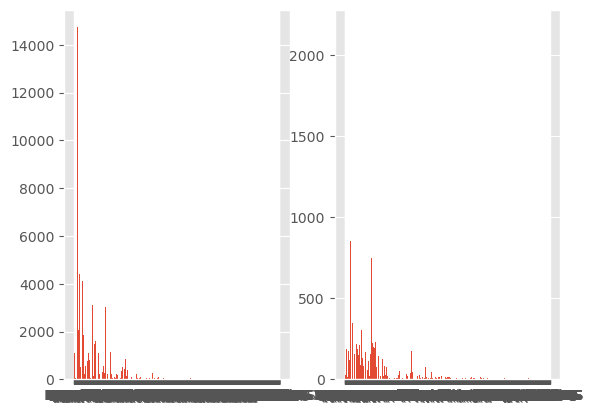

In [33]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

endo_words = list(endo_dict.keys())
endo_counts = list(endo_dict.values())

exo_words = list(exo_dict.keys())
exo_counts = list(exo_dict.values())

# Create the bar chart
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.bar(endo_words, endo_counts)

ax2.bar(exo_words, exo_counts)

# Add labels and title
""" ax.set_ylabel('Number of Occurrences')
ax.set_xlabel('Category')
ax.set_title('Occurrences of Ordinary Values in Categories')

# Add tick labels for the ordinary values
ax.set_xticklabels([''] + ordinary_values) """

plt.show()

In [43]:
import statistics

def norm_min_max(values: list[int], x : int) -> float:
    # x - min / max() - min()
    return (float(x)-min(values))/max(values) - min(values)

def norm_z(values: list[int], x: int) -> float:
    # (x-mean(x))/std()
    return (float(x)-statistics.mean(values))/statistics.stdev(values)

sorted_items = sorted(
            exo_dict.items(), key=lambda x: x[1], reverse=True
        )
counter = 0        

for key, value in sorted_items:
    print(f"{key}: {value}, "+
    #f"Min-Max-Norm: {norm_min_max(list(exo_dict.values()), value)},"+
    f" Z-Norm: {norm_z(list(exo_dict.values()), value)}| "+
    f"{endo_dict[key]},"+
    #f"Min-Max-Norm: {norm_min_max(list(endo_dict.values()), endo_dict[key])},"+
    f"Z-Norm: {norm_z(list(endo_dict.values()), endo_dict[key])}")

    counter += 1
    if counter == 10:
        break
print('_________')
sorted_items = sorted(
            endo_dict.items(), key=lambda x: x[1], reverse=True
        )
counter = 0

for key, value in sorted_items:
    print(f"{key}: {value}, "+
    #f"Min-Max-Norm: {norm_min_max(list(exo_dict.values()), value)},"+
    f" Z-Norm: {norm_z(list(endo_dict.values()), value)}| "+
    f"{exo_dict[key]},"+
    #f"Min-Max-Norm: {norm_min_max(list(endo_dict.values()), endo_dict[key])},"+
    f"Z-Norm: {norm_z(list(exo_dict.values()), exo_dict[key])}")
    counter += 1
    if counter == 10:
        break


CLC8o---: 2171,  Z-Norm: 16.6551585131045| 14230,Z-Norm: 19.205529838856613
PLC0o---: 1612,  Z-Norm: 12.273699477428904| 14737,Z-Norm: 19.899423634145283
ELC0o---: 1451,  Z-Norm: 11.01177657091053| 10768,Z-Norm: 14.467343804755277
SLC0o---: 1434,  Z-Norm: 10.87853005283095| 13096,Z-Norm: 17.65350703045947
KLC0o---: 1418,  Z-Norm: 10.753121565226639| 8524,Z-Norm: 11.39614523152495
VEE6o---: 1279,  Z-Norm: 9.663635329164192| 6699,Z-Norm: 8.898401293848769
ALC0o---: 1200,  Z-Norm: 9.04443092161791| 10703,Z-Norm: 14.37838306176955
CEE8o---: 1189,  Z-Norm: 8.958212586389946| 9082,Z-Norm: 12.159838994387036
TLC0o---: 1177,  Z-Norm: 8.864156220686713| 8086,Z-Norm: 10.796686686482666
LLC0o---: 1136,  Z-Norm: 8.542796971200667| 9427,Z-Norm: 12.632015245618971
_________
PLC0o---: 14737,  Z-Norm: 19.899423634145283| 1612,Z-Norm: 12.273699477428904
CLC8o---: 14230,  Z-Norm: 19.205529838856613| 2171,Z-Norm: 16.6551585131045
GLC0o---: 14040,  Z-Norm: 18.945490743975256| 750,Z-Norm: 5.517317207746679